In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Problem : Principal Component Analysis
**Principal component analysis** (PCA) is a technique of dimensionality reduction, which linearly maps data onto a lower-dimensional space, so that the variance of the projected data in the associated dimensions would be maximized. In this problem, you will perform PCA on a dataset of face images.

In [2]:
import cv2

## 1. mean face & first four eigenfaces

In [7]:
2
a=np.array(2)
a

array(2)

In [26]:
X_train,X_test=[],[]
Y_train,Y_test=[],[]
for i in range(1,41):
    for j in range(1,10):
        img=cv2.imread("data/{}_{}.png".format(i,j),cv2.IMREAD_GRAYSCALE)
        X_train.append(img)
        Y_train.append(i)
    img=cv2.imread("data/{}_10.png".format(i),cv2.IMREAD_GRAYSCALE)
    X_test.append(img)
    Y_test.append(i)

X_train=np.array(X_train)
X_test=np.array(X_test)
Y_train=np.array(Y_train)
Y_test=np.array(Y_test)

print(X_train.shape,Y_train.shape)    
print(X_test.shape)        
X_train

(360, 56, 46) (360,)
(40, 56, 46)


array([[[ 88,  88,  90, ...,  87,  85,  86],
        [ 87,  90,  90, ...,  87,  87,  87],
        [ 90,  89,  90, ...,  91,  88,  87],
        ...,
        [ 78,  70, 117, ...,  85,  73,  73],
        [ 94, 114, 170, ..., 119, 102,  83],
        [187, 199, 201, ..., 138, 142, 134]],

       [[ 87,  90,  95, ..., 138, 138, 133],
        [ 89,  90,  91, ..., 136, 133, 131],
        [ 91,  90,  90, ..., 142, 133, 126],
        ...,
        [198, 210, 125, ...,  76,  73,  73],
        [203, 211, 129, ..., 102,  80,  73],
        [204, 212, 152, ..., 124, 120,  88]],

       [[ 92,  92,  88, ..., 145, 149, 142],
        [ 93,  93,  90, ..., 145, 140, 144],
        [ 90,  88,  83, ..., 142, 141, 135],
        ...,
        [ 75,  76,  77, ..., 165, 153, 129],
        [ 75,  78,  77, ..., 169, 150, 139],
        [ 76,  77,  75, ..., 165, 146, 151]],

       ...,

       [[128, 128, 128, ..., 124, 124, 123],
        [128, 128, 128, ..., 124, 123, 125],
        [128, 129, 127, ..., 124, 125, 125

In [27]:
len(Y_train)

360

In [48]:
X_train

array([[[ 88,  88,  90, ...,  87,  85,  86],
        [ 87,  90,  90, ...,  87,  87,  87],
        [ 90,  89,  90, ...,  91,  88,  87],
        ...,
        [ 78,  70, 117, ...,  85,  73,  73],
        [ 94, 114, 170, ..., 119, 102,  83],
        [187, 199, 201, ..., 138, 142, 134]],

       [[ 87,  90,  95, ..., 138, 138, 133],
        [ 89,  90,  91, ..., 136, 133, 131],
        [ 91,  90,  90, ..., 142, 133, 126],
        ...,
        [198, 210, 125, ...,  76,  73,  73],
        [203, 211, 129, ..., 102,  80,  73],
        [204, 212, 152, ..., 124, 120,  88]],

       [[ 92,  92,  88, ..., 145, 149, 142],
        [ 93,  93,  90, ..., 145, 140, 144],
        [ 90,  88,  83, ..., 142, 141, 135],
        ...,
        [ 75,  76,  77, ..., 165, 153, 129],
        [ 75,  78,  77, ..., 169, 150, 139],
        [ 76,  77,  75, ..., 165, 146, 151]],

       ...,

       [[128, 128, 128, ..., 124, 124, 123],
        [128, 128, 128, ..., 124, 123, 125],
        [128, 129, 127, ..., 124, 125, 125

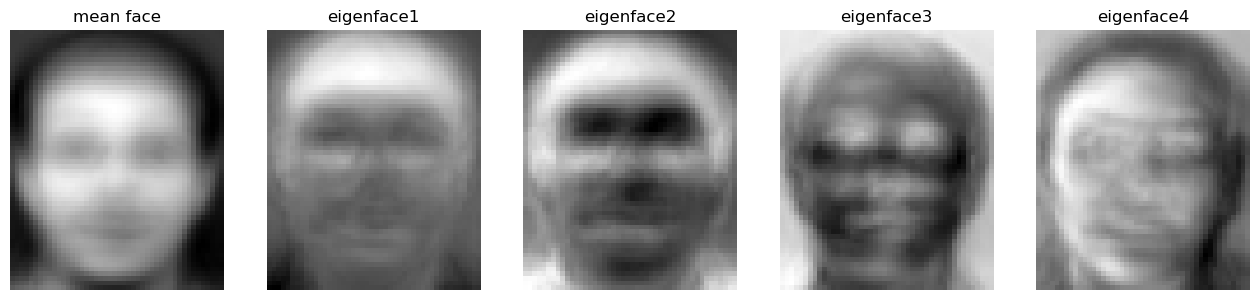

In [86]:
pca=PCA()
pca.fit(X_train.reshape(len(Y_train),-1))
plt.figure(figsize=(16,12))
plt.subplot(1,5,1)
plt.axis("off")
plt.title("mean face")
plt.imshow(pca.mean_.reshape(X_train[0].shape),cmap="gray")

for i in range(4):
    plt.subplot(1,5,i+2)
    plt.axis("off")
    plt.title("eigenface{}".format(i+1))
    plt.imshow(pca.components_[i].reshape(X_train[0].shape),cmap="gray")
    






In [85]:
pca.components_[1].shape

(2576,)

In [79]:
pca

PCA()

In [67]:
pca.mean_.reshape(X_train[0].shape)

array([[ 85.53055556,  85.675     ,  85.86944444, ...,  85.175     ,
         84.66666667,  84.36944444],
       [ 85.625     ,  85.71388889,  85.625     , ...,  85.29166667,
         85.075     ,  84.84166667],
       [ 85.79444444,  85.54166667,  85.14722222, ...,  84.65      ,
         85.28611111,  85.00833333],
       ...,
       [ 87.46388889,  89.08333333,  91.        , ...,  68.33333333,
         68.17777778,  69.18611111],
       [ 93.37222222,  95.53611111,  97.36944444, ...,  71.075     ,
         70.77222222,  71.325     ],
       [ 99.83055556, 102.69444444, 104.01944444, ...,  75.50555556,
         74.78055556,  74.24166667]])

In [71]:
X_train[0].shape

(56, 46)

In [83]:
pca.mean_.shape

(2576,)

In [69]:
X_train[0].shape

(56, 46)

In [59]:
X_train[0].shape

(56, 46)

In [68]:
reshape(X_train[0].shape)

NameError: name 'reshape' is not defined

In [28]:
X_train.shape

(360, 56, 46)

In [34]:
x=X_train.reshape(len(Y_train),-1)
print(x.shape)

(360, 2576)


In [35]:
x

array([[ 88,  88,  90, ..., 138, 142, 134],
       [ 87,  90,  95, ..., 124, 120,  88],
       [ 92,  92,  88, ..., 165, 146, 151],
       ...,
       [128, 128, 128, ...,  91,  92,  93],
       [122, 123, 124, ...,  38,  40,  38],
       [120, 119, 121, ...,  95,  92,  90]], dtype=uint8)

In [47]:
img=cv2.imread("data/2_1.png",cv2.IMREAD_GRAYSCALE).reshape(1,-1)
a=pca.transform(img)



ValueError: X has 46 features, but PCA is expecting 2576 features as input.

In [45]:
img

array([[124, 125, 125, ..., 116, 118, 115],
       [126, 125, 125, ..., 118, 117, 115],
       [126, 125, 125, ..., 118, 117, 116],
       ...,
       [ 94,  94,  93, ...,  35,  36,  35],
       [ 94,  93,  93, ...,  34,  34,  34],
       [ 92,  92,  93, ...,  33,  34,  34]], dtype=uint8)

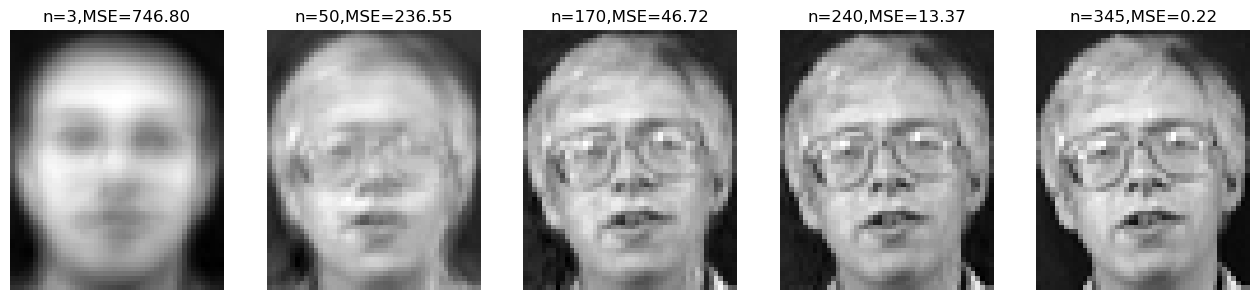

In [110]:
img=cv2.imread("data/2_1.png",cv2.IMREAD_GRAYSCALE).reshape(1,-1)
a=pca.transform(img)

plt.figure(figsize=(16,12))
n_components=[3,50,170,240,345]
for i ,n in enumerate(n_components):
    face=np.zeros(img.shape)
    for j in range(n):
        face=face+a[0][j]*pca.components_[j]
    face=face+pca.mean_
    MSE=np.mean((face-img)**2)
    plt.subplot(1,5,i+1)
    plt.axis("off")
    plt.title("n={},MSE={:.2f}".format(n,MSE))    
    plt.imshow(face.reshape(X_train[0].shape),cmap="gray")
    




In [106]:
X_train[0].shape

(56, 46)

In [107]:
face.shape

(1, 2576)

In [93]:
face=face+a[0][1]*pca.components_[1]
face

array([[ 16.99049104,  18.25971921,  15.92004319, ..., 163.97538434,
        104.083856  , 105.07084933]])

In [98]:
pca.components_[1]

array([-0.02919239, -0.0292641 , -0.02943494, ...,  0.01436437,
        0.01924303,  0.01866536])

## 2. Reconstruct person2 image1 using the first n = 3, 50, 170, 240, 345 eigenfaces
## 3. compute the mean squared error

In [11]:
oroginal_array=np.array([1,2,3,4,5,6])
reshaped_array=oroginal_array.reshape((3,2))
reshaped_array

array([[1, 2],
       [3, 4],
       [5, 6]])

In [23]:
a1=np.array([1,2,3,4,5])
a2=a1.reshape(-1,1)
a2

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [14]:
a=np.array([[1,2],[3,4]])
b=a.reshape(-1)
b

array([1, 2, 3, 4])

In [19]:
a=np.arange(24).reshape((3,2,4))
a

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]],

       [[16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [116]:
a=X_train.reshape(len(Y_train),-1)
a.shape

(360, 2576)

In [117]:
len(Y_train)

360

In [118]:
X_train.shape

(360, 56, 46)

## 4. cross-validation results

In [144]:
reduced_X_train=pca.transform(X_train.reshape(len(Y_train),-1))
K=[1,3,5]
N=[3,50,170]
random=np.random.permutation(len(Y_train))
reduced_X_train=reduced_X_train[random]
Y_train_random=Y_train[random]
for k in K:
    print("k={}".format(k))
    knn=KNeighborsClassifier(n_neighbors=k)
    for n in N:
        print("n={},".format(n),end="")
        score=cross_val_score(knn,reduced_X_train[:,:n],Y_train_random,cv=3)
        print("score={:.4f}".format(score.mean()))

k=1
n=3,score=0.7222
n=50,score=0.9667
n=170,score=0.9667
k=3
n=3,score=0.6444
n=50,score=0.9167
n=170,score=0.9111
k=5
n=3,score=0.5694
n=50,score=0.8667
n=170,score=0.8528


In [142]:
score

array([0.85      , 0.85833333, 0.81666667])

In [141]:
Y_train_random

array([37,  7, 19,  9,  6, 20, 34,  4, 29,  9, 34, 22, 24, 13,  9, 14,  3,
       24, 19, 20, 35, 25,  7, 14, 16,  6, 38, 29,  3, 32,  9, 12, 37, 32,
       36, 15, 20, 18, 24,  4, 28, 38, 22, 15,  5,  8, 24, 24, 36, 15, 17,
       27, 25, 22,  4, 38, 11, 28, 21,  7, 18, 38, 19, 21, 27,  3, 21, 36,
        5, 27, 33, 34, 28,  2, 14, 10, 11, 11, 40, 32,  1, 38, 22, 39, 16,
       10, 33, 18, 19, 31,  5,  3, 38, 22, 13, 38, 21,  6,  3, 26, 28, 27,
       11, 37, 15, 39, 33,  2, 19,  8, 31, 14, 37,  1, 24, 38, 25, 23, 36,
       23, 12, 23, 37, 14, 22, 12, 36, 17, 23, 24, 25,  6, 17, 20, 13, 32,
        2,  3, 36,  5, 28,  8, 31,  8, 32,  8, 16, 30, 12, 30, 31,  9, 36,
       25, 12, 26, 25,  9, 34,  9, 23, 37,  1, 37, 16, 32, 37, 35,  2, 29,
       35,  8, 20,  1,  7, 25, 39,  5, 30, 10, 23, 23, 11, 36, 25, 26, 36,
        8, 27, 11, 33, 40, 31, 14, 33, 34, 16, 10, 16, 30, 40, 39, 26, 39,
       40, 29, 10, 18, 34,  5,  2, 10,  3, 12, 32, 27, 19, 30, 40, 26, 24,
       23, 33, 34, 19, 29

## 5. recognition rate of the testing set

In [149]:
len(Y_test)

40

In [156]:
k=1
n=50
reduced_X_train=pca.transform(X_test.reshape(len(Y_test),-1))
knn=KNeighborsClassifier(n_neighbors=k)
knn.fit(reduced_X_train[:,:n],Y_train_random)
print("accuracy={}".format(knn.score(reduced_X_test[:,:n],Y_test)))

ValueError: Found input variables with inconsistent numbers of samples: [40, 360]

In [158]:
a=np.array([[2,-2,1],[1,2,2],[2,1,-2]])

In [170]:
b_inverse=np.linalg.inv(b)


In [160]:
print(a_inverse)

[[ 0.22222222  0.11111111  0.22222222]
 [-0.22222222  0.22222222  0.11111111]
 [ 0.11111111  0.22222222 -0.22222222]]


In [161]:
b=np.array([[2/3,-2/3,1/3],[1/3,2/3,2/3],[2/3,1/3,-2/3]])

In [162]:
e=np.array([[0,0,0],[0,12,0],[0,0,-12]])

In [168]:
result1=np.dot(b,e)

In [171]:
final=np.dot(result1,b_inverse)
final

array([[ 4.0000000e+00, -8.0000000e+00,  0.0000000e+00],
       [-8.0000000e+00,  8.8817842e-16,  8.0000000e+00],
       [ 0.0000000e+00,  8.0000000e+00, -4.0000000e+00]])

In [173]:
g=np.array([[4,-8,0],[-8,0,8],[0,8,-4]])

In [175]:
eigenvalue=np.linalg.eigvals(g)
eigenvalue

array([ 1.20000000e+01,  8.83038318e-16, -1.20000000e+01])

In [178]:
eigenvalues,eigenvectors=np.linalg.eig(g)
eigenvectors

array([[-0.66666667, -0.66666667, -0.33333333],
       [ 0.66666667, -0.33333333, -0.66666667],
       [ 0.33333333, -0.66666667,  0.66666667]])

In [179]:
h=np.array([[4,-1],[12,-3]])

In [180]:
eigenvalues,eigenvectors=np.linalg.eig(h)

In [181]:
eigenvalues,eigenvectors

(array([ 1.0000000e+00, -4.4408921e-16]),
 array([[0.31622777, 0.24253563],
        [0.9486833 , 0.9701425 ]]))

In [191]:
a=np.array([[1,2],[1,1]])
b=np.array([[2,1],[0,1]])
c=np.array([[3,1],[0,2]])


In [192]:
result=a+b
result

array([[3, 3],
       [1, 2]])

In [197]:
(a+b)@c

array([[9, 9],
       [3, 5]])

In [196]:
a@b+a@c

array([[5, 8],
       [5, 5]])

In [198]:
c@(a@b)

array([[ 8, 11],
       [ 4,  4]])

In [199]:
(c@a)@b

array([[ 8, 11],
       [ 4,  4]])

In [201]:
a@(c@b)

array([[6, 8],
       [6, 6]])

In [205]:
d=np.array([[1,0],[0,0]])

In [203]:
e=np.array([[2,-1],[0,2]])

In [206]:
d@e

array([[ 2, -1],
       [ 0,  0]])

In [207]:
e@d

array([[2, 0],
       [0, 0]])

In [213]:
a=np.array([[1,3],[0,1]])

In [214]:
b=np.array([[2,4],[2,3]])

In [215]:
c=np.array([[1,-2],[-1,2]])

In [216]:
a@c

array([[-2,  4],
       [-1,  2]])

In [217]:
b@c

array([[-2,  4],
       [-1,  2]])

In [218]:
a

array([[1, 3],
       [0, 1]])

In [219]:
b

array([[2, 4],
       [2, 3]])

In [220]:
np.transpose(a+b)

array([[3, 2],
       [7, 4]])

In [221]:
np.transpose(a)+np.transpose(b)

array([[3, 2],
       [7, 4]])

In [222]:
2*a

array([[2, 6],
       [0, 2]])

In [224]:
np.transpose(2*a)

array([[2, 0],
       [6, 2]])

In [225]:
2*np.transpose(a)

array([[2, 0],
       [6, 2]])

In [226]:
np.transpose(a@b)

array([[ 8,  2],
       [13,  3]])

In [227]:
np.transpose(b)@np.transpose(a)

array([[ 8,  2],
       [13,  3]])

In [228]:
a=np.array([[-1,2],[-1,1]])

In [230]:
b=np.array([[1,-2],[1,-1]])

In [231]:
a@b

array([[1, 0],
       [0, 1]])

In [232]:
b@a

array([[1, 0],
       [0, 1]])

In [233]:
a_inverse=np.linalg.inv(a)

In [236]:
at=np.transpose(a_inverse)

In [237]:
at

array([[ 1.,  1.],
       [-2., -1.]])

In [238]:
at1=np.transpose(a)

In [239]:
a_inverse2=np.linalg.inv(at1)

In [240]:
a_inverse2

array([[ 1.,  1.],
       [-2., -1.]])

In [248]:
a1=np.linalg.inv(a)

In [247]:
b1=np.linalg.inv(b)

In [249]:
ab1=np.linalg.inv(a@b)
ab1

array([[ 0.4, -0.6],
       [-0.2, -0.2]])

In [246]:
b=np.array([[3,1],[2,-1]])

In [250]:
b1@a1

array([[ 0.4, -0.6],
       [-0.2, -0.2]])

In [252]:
a=np.array([[1,0,0],[0,1,0],[-2,0,1]])
b=np.array([[1,0,0],[0,1,0],[0,4,1]])
np.linalg.inv(b@a)

array([[ 1., -0., -0.],
       [ 0.,  1.,  0.],
       [ 2., -4.,  1.]])

In [255]:
a=np.array([[1,2,4],[4,5,6],[7,8,9]])
deta=np.linalg.det(a)
deta

-3.000000000000002

In [257]:
b=np.array([[4,5,6],[1,2,4],[7,8,9]])
detb=np.linalg.det(b)
detb

3.000000000000002

In [260]:
c=np.array([[1,2,4],[7,11,18],[7,8,9]])
detc=np.linalg.det(c)
detc

-3.0000000000000018

In [262]:
d=np.array([[1,2,4],[12,15,18],[7,8,9]])
detd=np.linalg.det(d)
detd

-8.999999999999973

In [263]:
a

array([[1, 2, 4],
       [4, 5, 6],
       [7, 8, 9]])

In [264]:
b

array([[4, 5, 6],
       [1, 2, 4],
       [7, 8, 9]])

In [265]:
c

array([[ 1,  2,  4],
       [ 7, 11, 18],
       [ 7,  8,  9]])

In [267]:
b=np.array([[1,0,1],[2,3,1],[1,5,6]])
detb=np.linalg.det(b)
detb

20.000000000000007

In [268]:
deta

-3.000000000000002

In [270]:
np.linalg.det(a@b)

-60.00000000000009

In [271]:
np.linalg.det(a)*np.linalg.det(b)

-60.000000000000064

In [272]:
a

array([[1, 2, 4],
       [4, 5, 6],
       [7, 8, 9]])

In [ ]:
b=()